In [31]:
import pandas as pd
import pyarrow
import requests
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

# taxi+_zone_lookup

Zonas y tipos de servicios de NYC

Importamos esta tabla que nos va a permitir relacionarla con los viajes. De esta manera podemos filtrar los que suceden en Manhattan.

In [32]:
tzl = pd.read_csv("DATA/taxi+_zone_lookup.csv")

tzl.head(3)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone


In [33]:
tzl["LocationID"]

0        1
1        2
2        3
3        4
4        5
      ... 
260    261
261    262
262    263
263    264
264    265
Name: LocationID, Length: 265, dtype: int64

In [34]:
tzl["service_zone"].unique()

array(['EWR', 'Boro Zone', 'Yellow Zone', 'Airports', nan], dtype=object)

In [35]:
tzl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [36]:
zonas_manh = tzl["LocationID"][tzl["Borough"] == "Manhattan"]
zonas_manh

3        4
11      12
12      13
23      24
40      41
      ... 
245    246
248    249
260    261
261    262
262    263
Name: LocationID, Length: 69, dtype: int64

Nos quedamos con los LocationID que son dentro de Manhattan.

# yellow taxis trip records 2022-01

ID del vehículo, fecha y hora de subida y de bajada, número de pasajeros, distancia en millas, ID del tipo de viaje, ID zona subida y bajada, tipo de pago, monto del viaje, extra del viaje (espera, quizá), impuesto, propina, peaje, sobrecargo por mejora, monto total, sobrecargo por congestión, tarifa por aeropuerto.

In [37]:
yellow22 = pd.read_parquet("DATA/apis/yellow_tripdata_2022-01.parquet")

yellow22

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [38]:
yellow22.describe().round(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2463931.00,2463931,2463931,2392428.00,2463931.00,2392428.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2463931.00,2392428.00,2392428.00
mean,1.71,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.39,5.37,1.42,166.08,163.58,1.19,12.95,1.01,0.49,2.39,0.37,0.30,19.17,2.28,0.08
min,1.00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.00,0.00,1.00,1.00,1.00,0.00,-480.00,-4.50,-0.50,-125.22,-31.40,-0.30,-480.30,-2.50,-1.25
25%,1.00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.00,1.04,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.72,0.00,0.30,11.30,2.50,0.00
50%,2.00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.00,1.74,1.00,162.00,162.00,1.00,9.00,0.50,0.50,2.00,0.00,0.30,14.69,2.50,0.00
75%,2.00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.00,3.13,1.00,234.00,236.00,1.00,14.00,2.50,0.50,3.00,0.00,0.30,20.02,2.50,0.00
max,6.00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.00,306159.28,99.00,265.00,265.00,5.00,401092.32,33.50,16.59,888.88,193.30,0.30,401095.62,2.50,1.25
std,0.50,NaN,NaN,0.98,547.87,5.92,65.47,70.79,0.50,255.81,1.24,0.08,2.83,1.68,0.04,255.96,0.74,0.31


Encontramos dos datos outliers a simple vista, en la columna trip_distance y total_amount.

In [39]:
yellow22.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [40]:
# Calcula el rango intercuartílico (IQR) de la columna "total_fare"
Q1 = yellow22['total_amount'].quantile(0.25)
Q3 = yellow22['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers de la columna "total_fare"
yellow22 = yellow22[(yellow22['total_amount'] >= limite_inferior) & (yellow22['total_amount'] <= limite_superior)]
yellow22 = yellow22[yellow22["total_amount"] > 0]

Eliminamos los outliers de total_amount.

In [41]:
# Calcula el rango intercuartílico (IQR) de la columna "total_fare"
Q1 = yellow22['trip_distance'].quantile(0.25)
Q3 = yellow22['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers de la columna "total_fare"
yellow22 = yellow22[(yellow22['trip_distance'] >= limite_inferior) & (yellow22['trip_distance'] <= limite_superior)]

Eliminamos los outliers de trip_distance.

In [42]:
yellow22.shape

(2078836, 19)

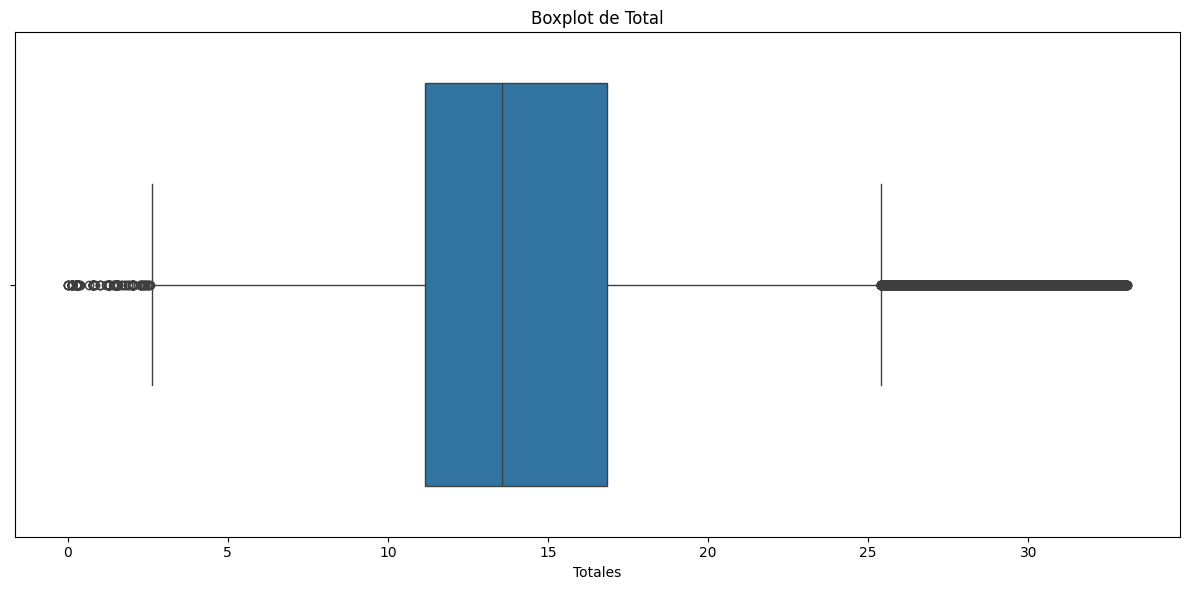

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=yellow22['total_amount'], ax=ax)
ax.set_title('Boxplot de Total') ; ax.set_xlabel('Totales')

plt.tight_layout()
plt.show()

Podemos observar que la media del total es 14 aprox y los valores comunmente se distribuyen entre los 11 y 17.

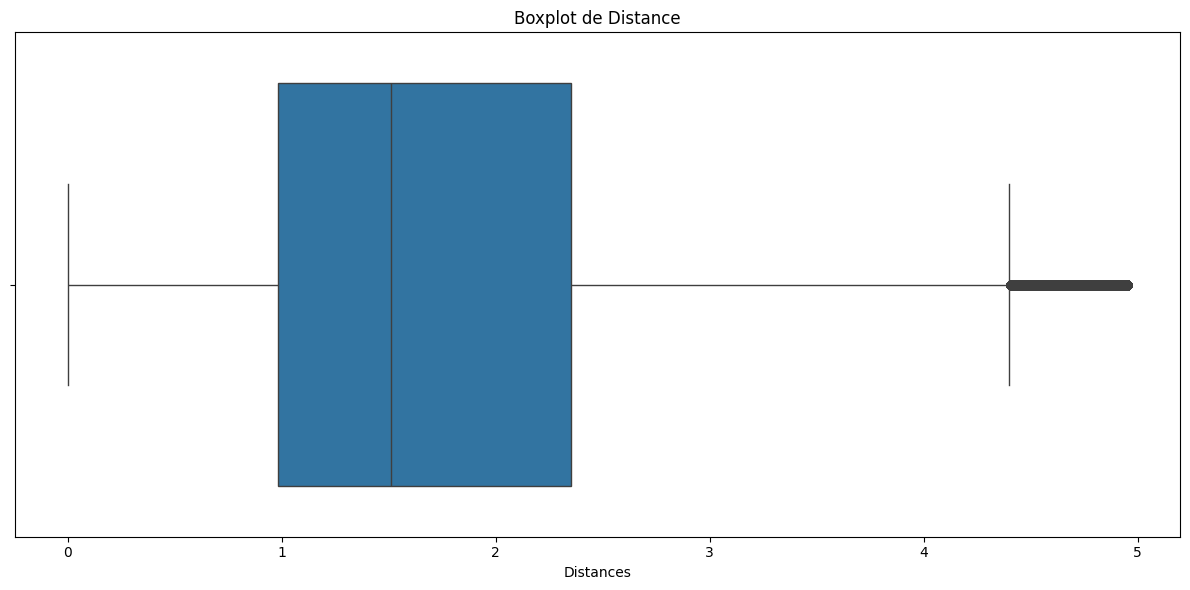

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=yellow22['trip_distance'], ax=ax)
ax.set_title('Boxplot de Distance') ; ax.set_xlabel('Distances')

plt.tight_layout()
plt.show()

Podemos observar que las distancias van entre 1 milla a 2,3 aproximadamente.

In [ ]:
# Convertir las columnas a tipo datetime
yellow22['tpep_dropoff_datetime'] = pd.to_datetime(yellow22['tpep_dropoff_datetime'])
yellow22['tpep_pickup_datetime'] = pd.to_datetime(yellow22['tpep_pickup_datetime'])

# Calcular la diferencia de tiempo en minutos
diferencia_tiempo = (yellow22['tpep_dropoff_datetime'] - yellow22['tpep_pickup_datetime']).dt.total_seconds() / 60

# Agregar la diferencia de tiempo en minutos como una nueva columna
yellow22['diferencia_tiempo'] = diferencia_tiempo.astype(int)


In [46]:
# Calcula el rango intercuartílico (IQR) de la columna "total_fare"
Q1 = yellow22['diferencia_tiempo'].quantile(0.25)
Q3 = yellow22['diferencia_tiempo'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers de la columna "total_fare"
yellow22 = yellow22[(yellow22['diferencia_tiempo'] >= limite_inferior) & (yellow22['diferencia_tiempo'] <= limite_superior)]

#nuevo_dataframe2 = nuevo_dataframe1[nuevo_dataframe1["total_amount"] > 0]

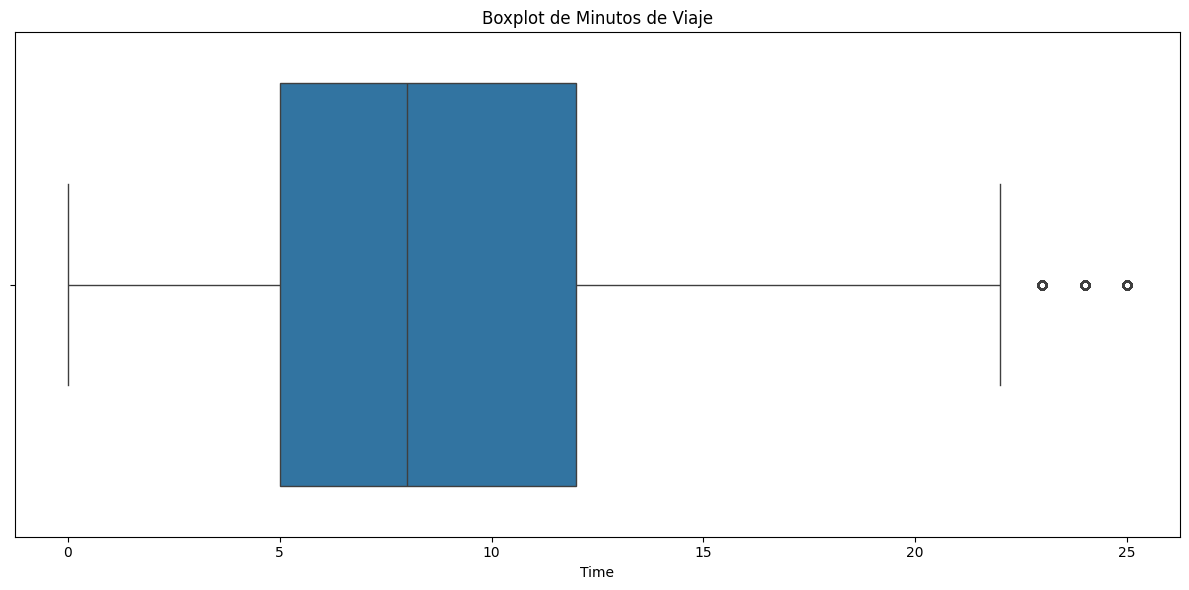

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=yellow22['diferencia_tiempo'], ax=ax)
ax.set_title('Boxplot de Minutos de Viaje') ; ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

Los viajes se dan comunmente entre 5 a 13 minutos.

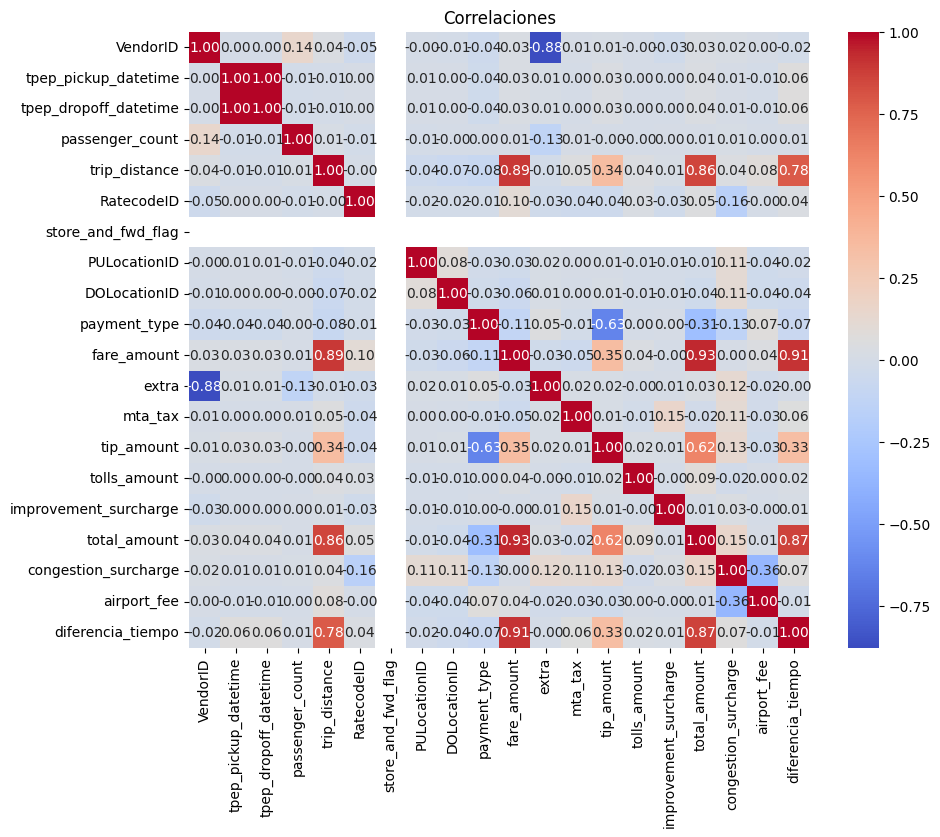

In [48]:
# Filtrar los datos para eliminar las filas que contienen "N" o "Y"
o = yellow22[(yellow22 != "N") & (yellow22 != "Y")]

# Calcular la matriz de correlación
correlacion = o.corr()

# Verificar si la matriz de correlación está vacía después de eliminar NaN
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
    # Graficar la matriz de correlación
    plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlaciones')
    plt.show()


Existe correlatividad entre la distancia de viaje y el total. También hay incidencia entre mayor es el total y/o el tiempo transcurrido mayor es la propina.

In [49]:
yellow22.shape

(2046770, 20)

In [50]:
# Filtrar las filas donde PULocationID o DOLocationID coincidan con los valores en zonas_manh
yellow22_manh = yellow22[yellow22['PULocationID'].isin(zonas_manh) | yellow22['DOLocationID'].isin(zonas_manh)]

yellow22_manh

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diferencia_tiempo
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.00,0.5,0.5,0.00,0.0,0.3,12.80,2.5,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463925,2,2022-01-31 23:02:51,2022-01-31 23:13:54,NaN,1.63,NaN,None,224,90,0,9.71,0.0,0.5,2.77,0.0,0.3,15.78,NaN,NaN,11
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11


Filtramos las filas donde el ID de subida y de bajada del pasajero son únicamente en distrito Manhattan.

In [51]:
yellow22_manh.describe().round(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diferencia_tiempo
count,2010018.00,2010018,2010018,1959521.00,2010018.00,1959521.00,2010018.00,2010018.00,2010018.00,2010018.00,2010018.00,2010018.00,2010018.00,2010018.00,2010018.0,2010018.00,1959521.00,1959521.00,2010018.00
mean,1.70,2022-01-17 03:50:08.961544,2022-01-17 03:59:56.233311,1.38,1.74,1.03,168.96,166.91,1.18,8.75,1.03,0.50,1.86,0.01,0.3,14.16,2.44,0.00,9.30
min,1.00,2008-12-31 23:03:01,2008-12-31 23:06:56,0.00,0.00,1.00,1.00,4.00,0.00,-5.17,0.00,-0.50,-3.60,0.00,0.0,0.30,0.00,0.00,0.00
25%,1.00,2022-01-09 19:26:09,2022-01-09 19:34:26.500000,1.00,0.97,1.00,137.00,114.00,1.00,6.00,0.00,0.50,1.00,0.00,0.3,11.00,2.50,0.00,5.00
50%,2.00,2022-01-17 14:07:43.500000,2022-01-17 14:16:50,1.00,1.50,1.00,163.00,163.00,1.00,8.00,0.50,0.50,2.00,0.00,0.3,13.53,2.50,0.00,8.00
75%,2.00,2022-01-24 13:39:20.500000,2022-01-24 13:49:15,1.00,2.30,1.00,236.00,236.00,1.00,11.00,2.50,0.50,2.67,0.00,0.3,16.63,2.50,0.00,12.00
max,6.00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.00,4.95,99.00,265.00,265.00,5.00,32.20,12.50,3.30,28.00,25.00,0.3,33.08,2.50,1.25,25.00
std,0.47,NaN,NaN,0.98,1.02,1.61,65.89,68.69,0.46,3.50,1.20,0.02,1.35,0.22,0.0,4.25,0.39,0.01,5.14


Tenemos un mínimo de pasajeros de 0 y un máximo de 9, con una mediana en 1 y promedio de 1.38.

Las distancias de viaje tienen un mínimo de casi 1 milla, mediana en 1.5 y un máximo de casi 5 millas, con promedio 1.74.

El precio final del viaje tiene promedio en 14.16, mínimo en 0.30, mediana en 13.53 y máximo en 33.08.

El tiempo de viaje tiene promedio 9.30 minutos, mínimo 0, mediana de 8 y máximo en 25.

In [52]:
yellow22_manh["payment_type"].mode()

0    1
Name: payment_type, dtype: int64

El método de pago de moda es 1 = Tarjeta de crédito.

In [53]:
# Crear una nueva columna 'hora' que contenga solo la hora
yellow22_manh['hora'] = yellow22_manh['tpep_pickup_datetime'].dt.hour

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93649/3035191308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh['hora'] = yellow22_manh['tpep_pickup_datetime'].dt.hour


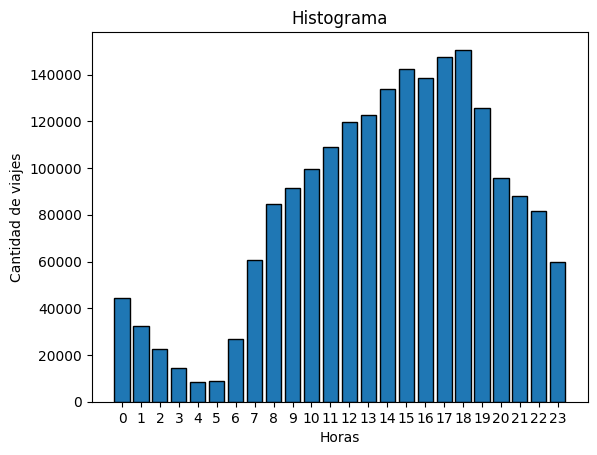

In [54]:
conteo_horas = yellow22_manh['hora'].value_counts()
ax = plt.bar(conteo_horas.index, conteo_horas, edgecolor='black')
plt.xlabel('Horas')
plt.ylabel('Cantidad de viajes')
plt.title('Histograma')
ax = plt.gca()
#ax.set_yticks([0, 5e5, 1e6, 1.5e6, 2e6])
#ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
plt.xticks(range(24), range(24))
plt.show()

La gran mayoría de los viajes comienzan entre las 11 y 19hs para Enero 2022.

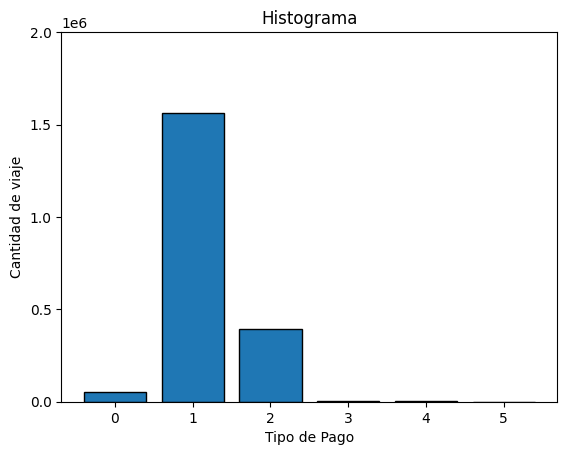

In [55]:
conteo_pagos = yellow22_manh['payment_type'].value_counts()
ax = plt.bar(conteo_pagos.index, conteo_pagos, edgecolor='black')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de viaje')
plt.title('Histograma')
ax = plt.gca()
ax.set_yticks([0, 500000, 1000000, 1500000, 2000000])
#ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
#plt.xticks(range(6), range(6))
plt.show()

In [56]:
# Convertir la columna 'fecha_hora' a tipo datetime si aún no está en ese formato
yellow22_manh['tpep_pickup_datetime'] = pd.to_datetime(yellow22_manh['tpep_pickup_datetime'])

# Crear una nueva columna 'dia_semana' que contenga el día de la semana en español
yellow22_manh['dia_semana'] = yellow22_manh['tpep_pickup_datetime'].dt.strftime('%A')

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93649/629692688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh['tpep_pickup_datetime'] = pd.to_datetime(yellow22_manh['tpep_pickup_datetime'])
/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93649/629692688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh['dia_semana'] = yellow22_manh['tpep_pickup_datetime'].dt.strftime('%A')


In [57]:
yellow22_manh['dia_semana'].unique()

array(['Saturday', 'Friday', 'Wednesday', 'Sunday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

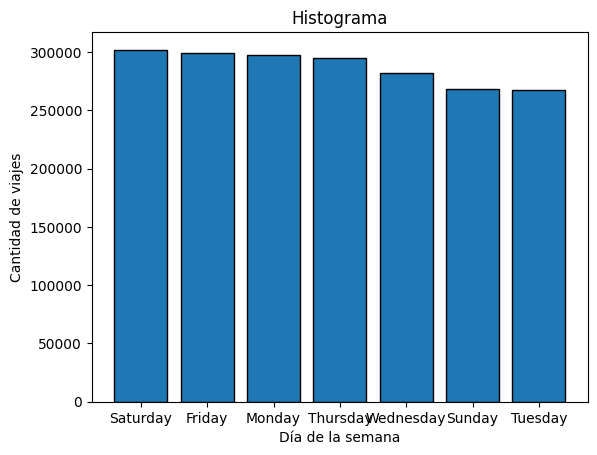

In [58]:
conteo_dias = yellow22_manh['dia_semana'].value_counts()
ax = plt.bar(conteo_dias.index, conteo_dias, edgecolor='black')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Histograma')
ax = plt.gca()
#ax.set_yticks([0, 500000])
#ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
#plt.xticks(range(6), range(6))
plt.show()

Los días de la semana con mayor cantidad de viaje son por orden descendente Sábados, Viernes y Lunes.

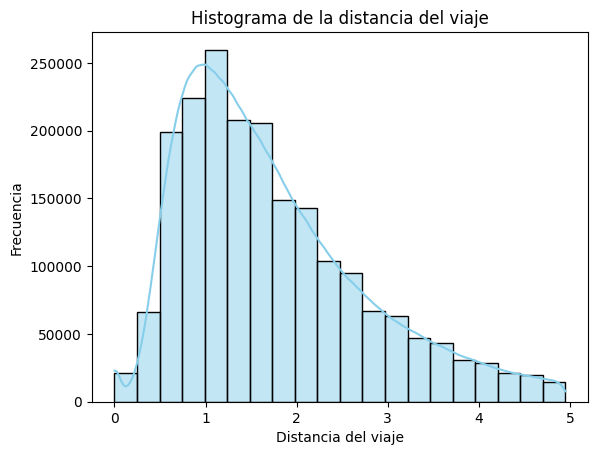

In [59]:
sns.histplot(yellow22_manh['trip_distance'], bins=20, kde=True, color='skyblue')
plt.xlabel('Distancia del viaje')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distancia del viaje')
plt.show()

La gran mayoría de los viajes tienen una distancia entre los 0.5 y 2.5 millas.

In [61]:
yellow22_manh.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          50497
trip_distance                0
RatecodeID               50497
store_and_fwd_flag       50497
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     50497
airport_fee              50497
diferencia_tiempo            0
hora                         0
dia_semana                   0
dtype: int64

Visualizamos los valores nulos.

In [62]:
yellow22_manh["passenger_count"].mode()

0    1.0
Name: passenger_count, dtype: float64

In [63]:
yellow22_manh["passenger_count"] = yellow22_manh["passenger_count"][yellow22_manh["passenger_count"].isnull()] = 1

yellow22_manh["store_and_fwd_flag"] = yellow22_manh["store_and_fwd_flag"][yellow22_manh["store_and_fwd_flag"].isnull()] = 1

yellow22_manh.drop("store_and_fwd_flag", axis=1, inplace=True)

yellow22_manh["RatecodeID"] = yellow22_manh["RatecodeID"][yellow22_manh["RatecodeID"].isnull()] = 1

yellow22_manh["airport_fee"] = yellow22_manh["airport_fee"][yellow22_manh["airport_fee"].isnull()] = 0

yellow22_manh["congestion_surcharge"] = yellow22_manh["congestion_surcharge"][yellow22_manh["congestion_surcharge"].isnull()] = 0

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93649/1818308217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh["passenger_count"] = yellow22_manh["passenger_count"][yellow22_manh["passenger_count"].isnull()] = 1
/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93649/1818308217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh["passenger_count"] = yellow22_manh["passenger_count"][yellow22_manh["passenger_count"].isnull()] = 1
/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93649/1818308217.py:3: S

Imputamos cada valor por su equivalente según el diccionario de datos para evitar mantener el nulo.

In [64]:
yellow22_manh.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
diferencia_tiempo        0
hora                     0
dia_semana               0
dtype: int64

In [65]:
yellow22_manh.head(8)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diferencia_tiempo,hora,dia_semana
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,1,3.80,1,142,236,1,14.5,...,0.5,3.65,0.0,0.3,21.95,0,0,17,0,Saturday
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,1,236,42,1,8.0,...,0.5,4.00,0.0,0.3,13.30,0,0,8,0,Saturday
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,1,166,166,1,7.5,...,0.5,1.76,0.0,0.3,10.56,0,0,8,0,Saturday
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,1,114,68,2,8.0,...,0.5,0.00,0.0,0.3,11.80,0,0,10,0,Saturday
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1,2.02,1,238,152,2,9.0,...,0.5,0.00,0.0,0.3,12.80,0,0,9,0,Saturday
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1,2.71,1,166,236,1,12.0,...,0.5,2.25,0.0,0.3,18.05,0,0,14,0,Saturday
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1,0.78,1,236,141,2,5.0,...,0.5,0.00,0.0,0.3,8.80,0,0,4,0,Saturday
10,2,2022-01-01 00:55:03,2022-01-01 01:04:25,1,1.91,1,141,229,2,8.5,...,0.5,0.00,0.0,0.3,12.30,0,0,9,0,Saturday
